# Учебный проект "Принятие решений в бизнесе на основе данных"

> # Цель проекта:
- Проверка гипотез,
- Анализ результатов А/В-теста.

> # Задачи проекта:
- Импортировать библиотеки, необходимые для анализа,
- Прочитать датасеты,
- Провести предобработку датасетов,
- Провести приоритизацию гипотез,
- Применить фреймворки ICE и RICE,
- Сформулировать выводы по первой части исследования,
- Провести А/В-тест,
- Построить графики,
- Посчитать перцентили,
- Посчитать статистическую значимость,
- Сформулировать выводы по второй части исследования,
- Сформулировать окончательные выводы по проекту.

# Оглавление:
- <a id='1'>Импорт библиотек</a>
- <a id='3'>Импорт датасетов</a>
- <a id='7'>Проверка дубликатов и NaN</a>
- <a id='10'>Промежуточные результаты</a>
- <a id='11'>Приоритизация гипотез. ICE и RICE</a>
- <a id='23'>Приоритизация гипотез. Выводы</a>
- <a id='24'>А/В-тест.График кумулятивной выручки по группам</a>
- <a id='36'>Промежуточные выводы</a>
- <a id='37'>А/В-тест.График кумулятивного чека по группам</a>
- <a id='38'>Промежуточные выводы</a>
- <a id='39'>А/В-тест.График относительного изменения кумулятивного среднего чека группы B к группе A</a>
- <a id='40'>Промежуточные выводы</a>
- <a id='41'>А/В-тест.График кумулятивной конверсии по группам</a>
- <a id='43'>Промежуточные выводы</a>
- <a id='44'>А/В-тест.График относительного изменения кумулятивной конверсии группы B к группе A</a>
- <a id='45'>Промежуточные выводы</a>
- <a id='46'>А/В-тест.Точечный график количества заказов по пользователям</a>
- <a id='47'>Промежуточные выводы</a>
- <a id='48'>Подсчет 95-го и 99-го перцентилей количества заказов на пользователя. Выбор границы для определения аномальных пользователей</a>
- <a id='52'>Точечный график стоимости заказов</a>
- <a id='52'>Промежуточные выводы</a>
- <a id='53'>Подсчет 95-го и 99-го перцентилей стоимости заказов. Выбор границы для определения аномальных заказов</a>
- <a id='56'>Посчет статистической значимости различий в конверсии между группами по «сырым» данным</a>
- <a id='59'>Промежуточные выводы</a>
- <a id='60'>Подсчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным</a>
- <a id='63'>Промежуточные выводы</a>
- <a id='64'>Подсчет статистической значимости различий в конверсии между группами по «очищенным» данным</a>
- <a id='65'>Промежуточные выводы</a>
- <a id='66'>Подсчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным</a>
- <a id='69'>Промежуточные выводы</a>
- <a id='69'>Окончательные выводы</a>
- <a id='69'>Рекомендации</a>

___

## Предобработка датасетов

In [1]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import math as mth
import warnings

In [2]:
# Заранее избавляемся от возможных предупреждений
warnings.filterwarnings('ignore')

In [3]:
# Импортируем датасеты
hypothesis = pd.read_csv('/Users/denisbogomolov/Documents/Data_Analysis/hypothesis.csv')
orders = pd.read_csv('/Users/denisbogomolov/Documents/Data_Analysis/orders.csv')
visitors = pd.read_csv('/Users/denisbogomolov/Documents/Data_Analysis/visitors.csv')

In [4]:
# Выводим результаты
pd.set_option('display.max_colwidth', 1)
hypothesis.sample(9)

,Hypothesis,Reach,Impact,Confidence,Efforts
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3


In [5]:
# Выводим результаты
orders.sample(5)

,transactionId,visitorId,date,revenue,group
289,1651482177,2147998719,2019-08-02,2210,A
33,486237576,2378935119,2019-08-15,1650,A
403,2890964573,3704741858,2019-08-28,460,B
1047,1266191879,4259830713,2019-08-11,3190,A
808,2344401705,366673373,2019-08-05,1460,A


In [6]:
# Выводим результаты
visitors.sample(5)

,date,group,visitors
20,2019-08-21,A,646
40,2019-08-10,B,369
10,2019-08-11,A,718
48,2019-08-18,B,737
52,2019-08-22,B,650


In [7]:
# Пишем функцию для вывода info(), проверки дубликатов и NaN
def info (dataframe):
    print (dataframe.info())
    print()
    print ('Количество duplicates:',dataframe.duplicated().sum())
    print()
    print('Количество NaN:')
    print(dataframe.isnull().sum())

In [8]:
# Выводим результаты
info(hypothesis)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None

Количество duplicates: 0

Количество NaN:
Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64


In [9]:
# Выводим результаты
info(orders)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None

Количество duplicates: 0

Количество NaN:
transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64


In [10]:
# Выводим результаты
info(visitors)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None

Количество duplicates: 0

Количество NaN:
date        0
group       0
visitors    0
dtype: int64


### Промежуточные результаты:
- Датасеты прочитаны,
- Дубликатов и пропущенных значений нет,
- Данные годятся для дальнейшего анализа.

___

## Приоритизация гипотез. Применение фрейморков ICE и RICE

In [11]:
# Применяем фреймворк ICE
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

In [12]:
# Выводим полученный результат; используем метод .sort_values()
hypothesis.sort_values('ICE', ascending=False).round(2).head(9)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


In [13]:
# Создаем список гипотез для отображения на гистограмме
ice_hyp_list=['Изменение цвета фона','Изменение структуры категорий','Страница отзывов клиентов',
          'Собственная служба доставки','Блок рекомендаций',
          'Баннеры на главной','Форма подписки','Два новых канала привлечения','Скидка в день рождения']

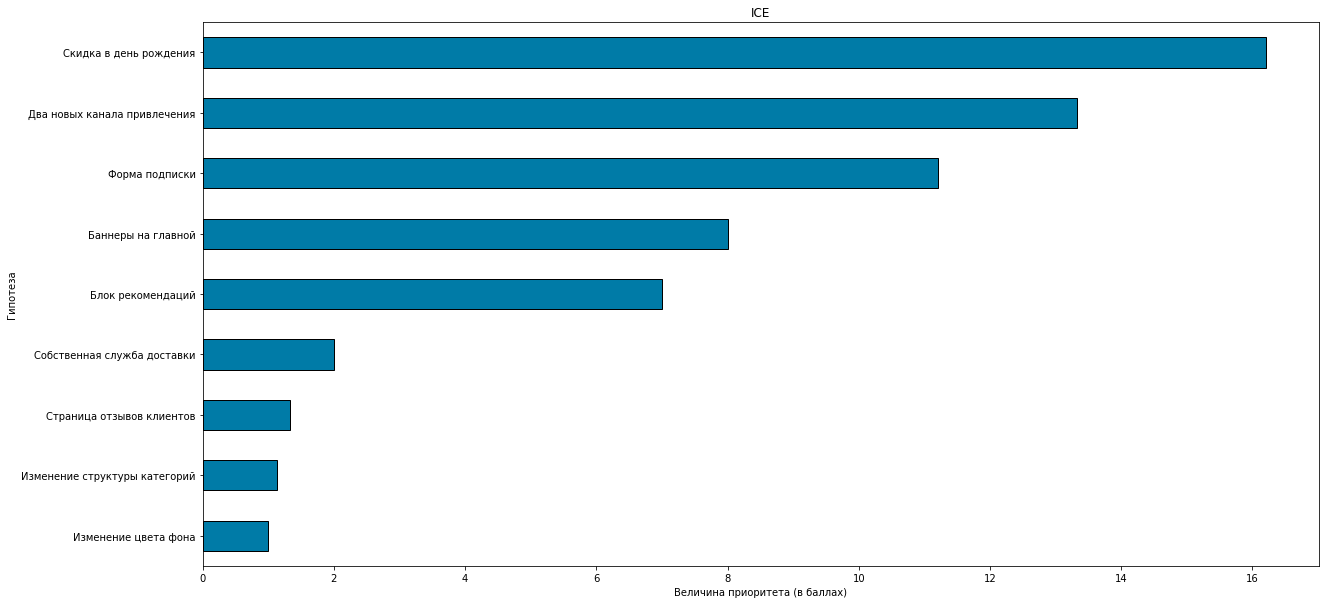

In [14]:
# Формируем гистограмму
ax = hypothesis[['Hypothesis', 'ICE']].sort_values('ICE', ascending=True).plot(kind='barh',figsize=(20, 10), color='#007BA7', ec='black', legend=False)
ax.set_yticklabels(ice_hyp_list, rotation=0)
ax.set_xlabel('Величина приоритета (в баллах)')
ax.set_ylabel('Гипотеза')
ax.set_title('ICE')
plt.show()

In [15]:
# Применяем фреймворк RICE
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

In [16]:
# Выводим полученный результат; используем метод .sort_values()
hypothesis.sort_values('RICE', ascending=False).round(2).head(9)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


In [17]:
# Создаем список гипотез для отображения на гистограмме
rice_hyp_list=['Изменение цвета фона','Страница отзывов клиентов','Собственная служба доставки',
               'Изменение структуры категорий','Скидка в день рождения','Баннеры на главной',
               'Два новых канала привлечения','Блок рекомендаций','Форма подписки',]

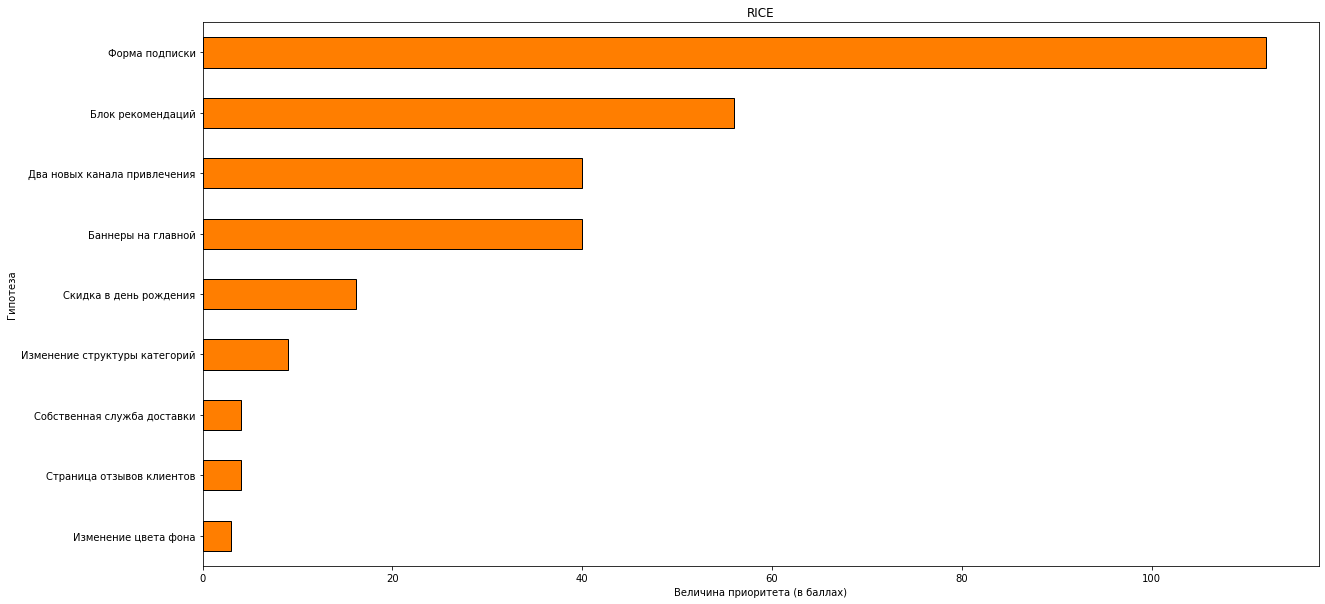

In [18]:
# Формируем гистограмму
ax = hypothesis[['Hypothesis', 'RICE']].sort_values('RICE', ascending=True).plot(kind='barh',figsize=(20, 10), color='#FF7E00', ec='black', legend=False)
ax.set_yticklabels(rice_hyp_list, rotation=0)
ax.set_xlabel('Величина приоритета (в баллах)')
ax.set_ylabel('Гипотеза')
ax.set_title('RICE')
plt.show()

In [19]:
# Формируем новый датасет hypothesis_ICE с тремя столбцами
hypothesis_ICE = hypothesis[['Hypothesis', 'ICE']].reset_index().round(2)
hypothesis_ICE.columns = ['ICE_index','Hypothesis', 'ICE']
hypothesis_ICE

,ICE_index,Hypothesis,ICE
0,0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
1,1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
2,2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
3,3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00
5,5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
6,6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
7,7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
8,8,"Запустить акцию, дающую скидку на товар в день рождения",16.20


In [20]:
# Формируем новый датасет hypothesis_RICE с тремя столбцами
hypothesis_RICE = hypothesis[['Hypothesis', 'RICE']].reset_index().round(2)
hypothesis_RICE.columns = ['RICE_index','Hypothesis', 'RICE']
hypothesis_RICE

,RICE_index,Hypothesis,RICE
0,0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
1,1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
2,2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
3,3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
4,4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0
5,5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
6,6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
7,7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
8,8,"Запустить акцию, дающую скидку на товар в день рождения",16.2


In [21]:
# Объединяем новые датасеты в единую таблицу
hypothesis_summary = hypothesis_RICE.merge(hypothesis_ICE, on='Hypothesis').sort_values(by='RICE', ascending=False)
hypothesis_summary= hypothesis_summary[['Hypothesis', 'ICE', 'RICE']]
hypothesis_summary

,Hypothesis,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00,3.0


In [22]:
# Формируем новый список гипотез для объединенной таблицы
hs_list=['Изменение цвета фона','Страница отзывов клиентов','Собственная служба доставки',
               'Изменение структуры категорий','Скидка в день рождения','Баннеры на главной',
               'Два новых канала привлечения','Блок рекомендаций','Форма подписки',]

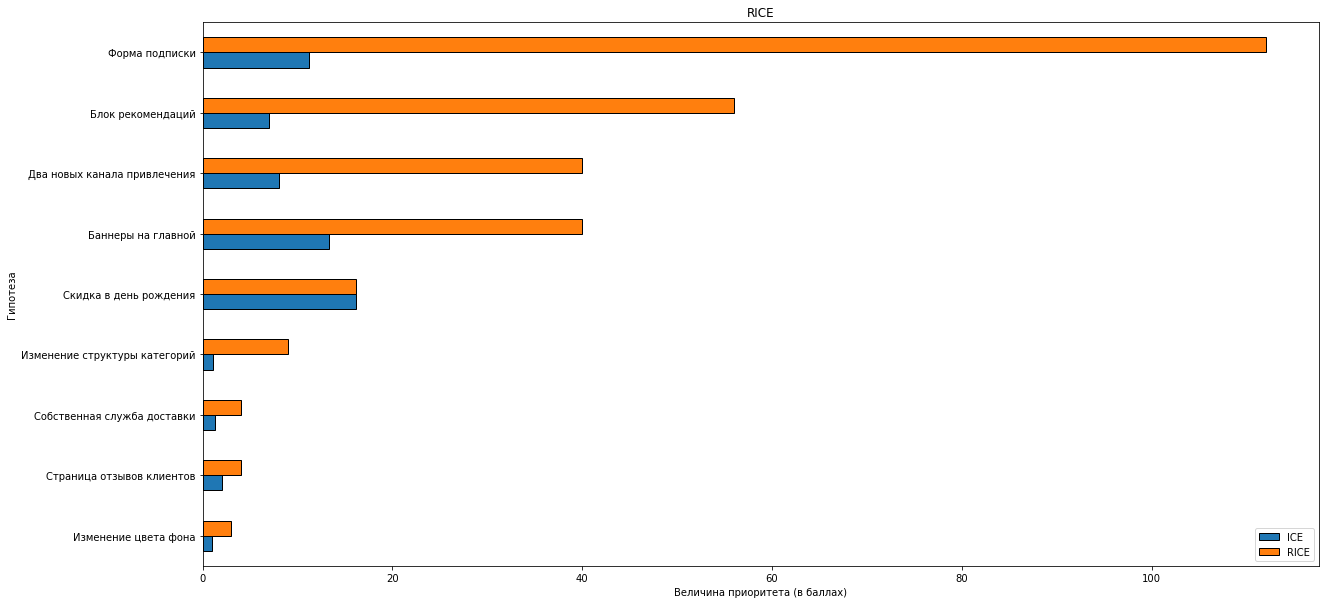

In [23]:
# Выводим объединенную гистограмму
ax = hypothesis_summary[['ICE', 'RICE']].sort_values('RICE', ascending=True).plot(kind='barh',figsize=(20, 10), ec='black', legend=True)
ax.set_yticklabels(hs_list, rotation=0)
ax.set_xlabel('Величина приоритета (в баллах)')
ax.set_ylabel('Гипотеза')
ax.set_title('RICE')
plt.show()

### Приоритизация гипотез. Выводы:
- Использование фреймворка ICE показало, что наиболее значимыми являются гипотезы "Запустить акцию, дающую скидку на товар в день рождения" (8), "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" (0) и "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" (7).
- Использование фреймворка RICE, в свою очередь, наиболее значимыми, обозначило следующие гипотезы: "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" (7), "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа" (2), "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" (0) и "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию" (6).
- За счет применения параметра REACH, выросла значимость гипотез "Добавить форму подписки" и "Добавить блоки рекомендаций".
- При этом гипотеза "Скидка на товар в день рождения", превалирующая в ICE, за счет параметра REACH снизила приоритет.
- Применение фреймворка RICE существенным образом изменило значимость гипотез 7, 2, 0 и 6.

___

## Анализ А/В-теста

### График кумулятивной выручки по группам

In [24]:
# Еще раз выводим датасет orders
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [25]:
# Создаем новый датасет с группировкой по столбцам 'date'и 'group'
# Применяем функцию .agg()
orders_grouped = (orders.groupby(['date','group'], as_index=False)\
                  .agg({'transactionId':'nunique','visitorId':'nunique','revenue':'sum'}))

In [26]:
# Выводим результат
orders_grouped.head(5)

,date,group,transactionId,visitorId,revenue
0,2019-08-01,A,24,20,148579
1,2019-08-01,B,21,20,101217
2,2019-08-02,A,20,19,93822
3,2019-08-02,B,24,23,165531
4,2019-08-03,A,24,24,112473


In [27]:
# Создаем "двойника" столбца 'group' для выведения кумулятивной суммы
# Сбрасываем индекс в orders_grouped
# Формируем новый датасет, группируя столбцы 'date'и 'group' по столбцу 'group_1'
orders_grouped['group_1'] = orders_grouped['group']
orders_grouped = orders_grouped.set_index(['date','group'])
orders_cumsum = orders_grouped.sort_values(['date','group']).groupby('group_1').cumsum().reset_index()

In [28]:
# Выводим результат
orders_cumsum.head(5)

,date,group,transactionId,visitorId,revenue
0,2019-08-01,A,24,20,148579
1,2019-08-01,B,21,20,101217
2,2019-08-02,A,44,39,242401
3,2019-08-02,B,45,43,266748
4,2019-08-03,A,68,63,354874


In [29]:
# Формируем новый датасет на основе датасета visitors
# Применяем функцию .agg()
# Подсчитываем сумму визитов по дням в каждой группе
visitors_cumsum = visitors.groupby(['date','group'], as_index=False)\
.agg({'visitors':'sum'}).sort_values(['date','group'])

In [30]:
# Создаем "двойника" столбца 'group' для выведения кумулятивной суммы
# Выводим кумулятивную сумму
visitors_cumsum['group_1'] = visitors_cumsum['group']
visitors_cumsum = visitors_cumsum.set_index(['date','group']).groupby('group_1').cumsum().reset_index()

In [31]:
# методом .join() формируем объединенный датасет
general_cum = orders_cumsum.join(visitors_cumsum[['visitors']])

In [32]:
# Выводим результат
general_cum.head(5)

,date,group,transactionId,visitorId,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,39,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,63,354874,1845


In [33]:
# Для дальнейших рассчетов формируем столбец со средним чеком
# Для дальнейших рассчетов формируем столбец с конверсией
general_cum['average_sum'] = (general_cum['revenue'] / general_cum['transactionId'])
general_cum['conversion'] = (general_cum['transactionId'] / general_cum['visitors'])

In [34]:
# Выводим окончательно сформированный датасет
general_cum.head(5)

,date,group,transactionId,visitorId,revenue,visitors,average_sum,conversion
0,2019-08-01,A,24,20,148579,719,6190.791667,0.033380
1,2019-08-01,B,21,20,101217,713,4819.857143,0.029453
2,2019-08-02,A,44,39,242401,1338,5509.113636,0.032885
3,2019-08-02,B,45,43,266748,1294,5927.733333,0.034776
4,2019-08-03,A,68,63,354874,1845,5218.735294,0.036856


In [35]:
# Объявляем переменные в которых сохраняем данные о выручке, числе заказов и датах в группах А и В
general_cumA = general_cum[general_cum['group']=='A'][['date','revenue', 'transactionId']]
general_cumB = general_cum[general_cum['group']=='B'][['date','revenue', 'transactionId']]

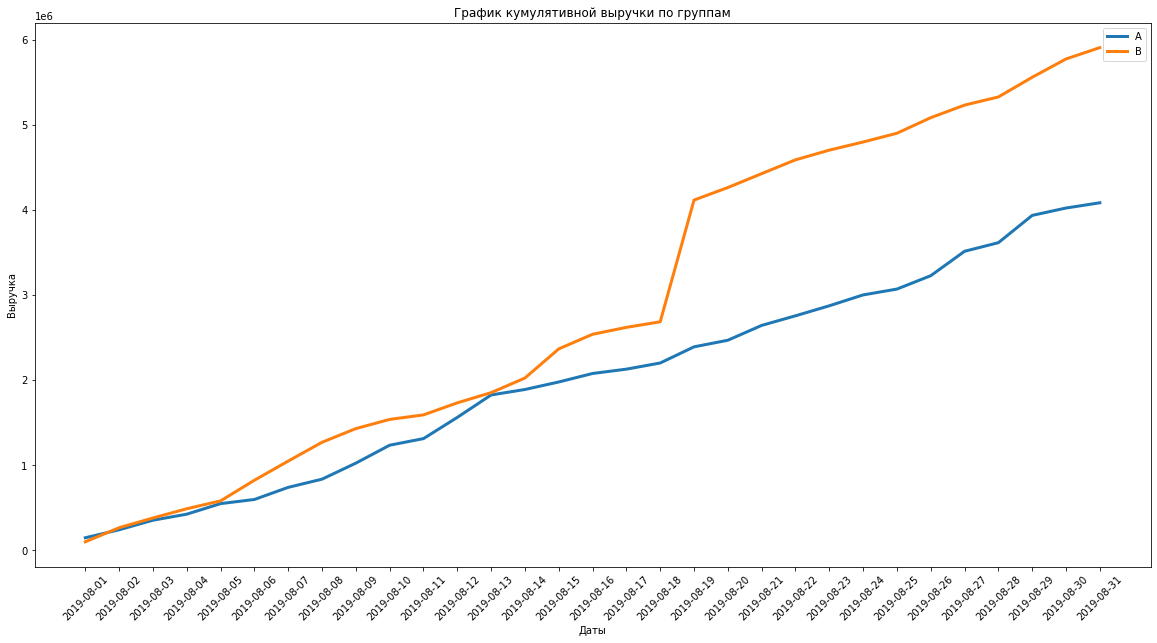

In [36]:
# Выводим график кумулятивной выручки по группам
plt.figure(figsize=(20, 10))
plt.plot(general_cumA['date'], general_cumA['revenue'], label='A',linewidth=3)
plt.plot(general_cumB['date'], general_cumB['revenue'], label='B',linewidth=3)
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Даты')
plt.ylabel("Выручка")
plt.xticks(rotation=45)
plt.legend()
plt.show()

### Промежуточные выводы:
- В начале второй половины теста показатели группы В резко пошли вверх.
- Данный скачок явным образом напоминает выброс.
- Перед и после скачка показатели группы В растут линейно.
- Показатели группы А растут линейно  в течение всего эксперимента.

### График кумулятивного чека по группам

In [37]:
# Объявляем переменные в которых сохраняем данные о датах и среднем кумулятивном чеке в группах А и В
general_cumA = general_cum[general_cum['group']=='A'][['date', 'average_sum']]
general_cumB = general_cum[general_cum['group']=='B'][['date', 'average_sum']]

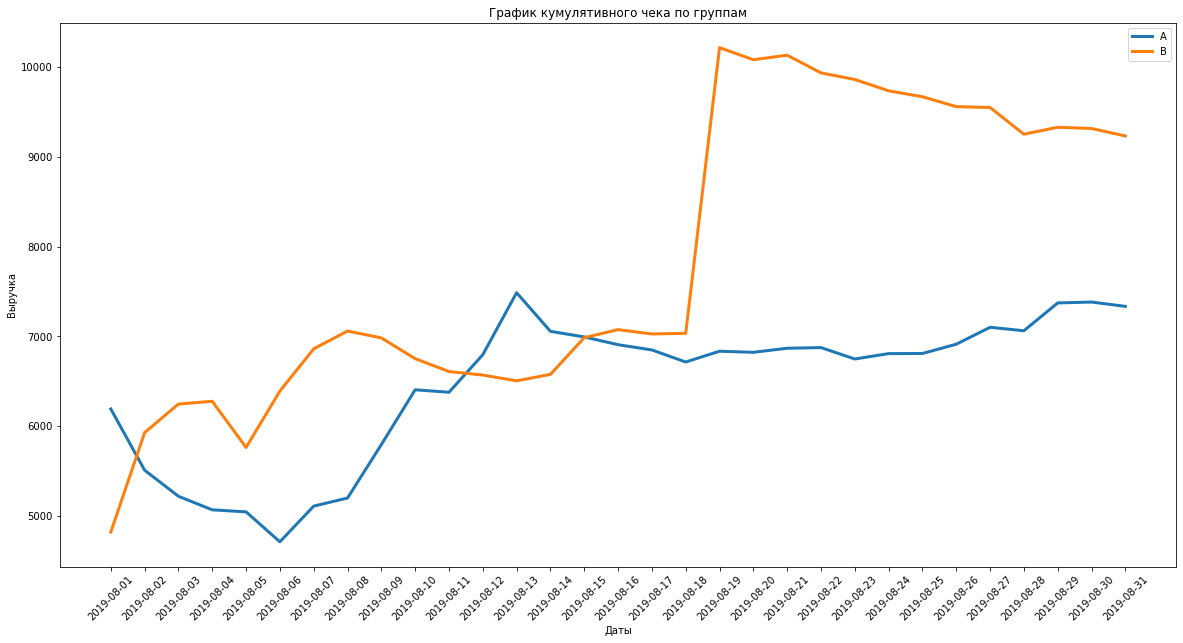

In [38]:
# Выводим график кумулятивного чека по группам
plt.figure(figsize=(20, 10))
plt.plot(general_cumA['date'], general_cumA['average_sum'], label='A',linewidth=3)
plt.plot(general_cumB['date'], general_cumB['average_sum'], label='B',linewidth=3)
plt.title('График кумулятивного чека по группам')
plt.xlabel('Даты')
plt.ylabel("Выручка")
plt.xticks(rotation=45)
plt.legend()
plt.show()

### Промежуточные выводы:
- После резкого скачка в начале второй половины исследования, кумулятивный чек группы В начал плавно снижаться.
- Кумулятивный чек группы А после падения в самом начале эксперимента вырос и, после небольшой коррекции, плавно увеличивается.

### График относительного изменения кумулятивного среднего чека группы B к группе A

In [39]:
# Формируем новую таблицу методом .merge()
general_cum_merge=(general_cumA[['date', 'average_sum']].merge(general_cumB[['date', 'average_sum']], 
                                            left_on='date', right_on='date', how='left', suffixes=['_A', '_B']))

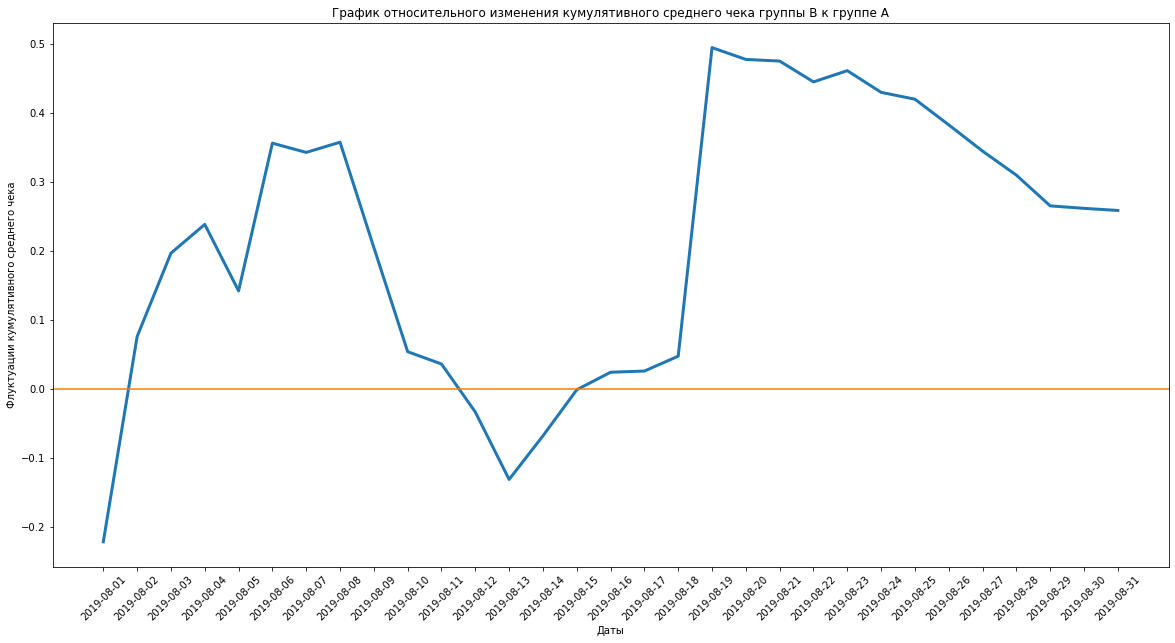

In [40]:
# Выводим график
plt.figure(figsize=(20, 10))
plt.plot(general_cum_merge['date'], general_cum_merge['average_sum_B'] / general_cum_merge['average_sum_A']-1,linewidth=3)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.axhline(y=0, color='#FF7E00', linestyle='-')
plt.xlabel('Даты')
plt.ylabel('Флуктуации кумулятивного среднего чека')
plt.xticks(rotation=45)
plt.show()

### Промежуточные выводы:
- Имеется три  пика, когда результаты теста резко менялись в несколько дат. 
- Видимо, именно тогда были совершены аномальные заказы.

### График кумулятивной конверсии по группам

In [41]:
# Объявляем переменные для построения графика 
general_cumA = general_cum[general_cum['group']=='A']
general_cumB = general_cum[general_cum['group']=='B']

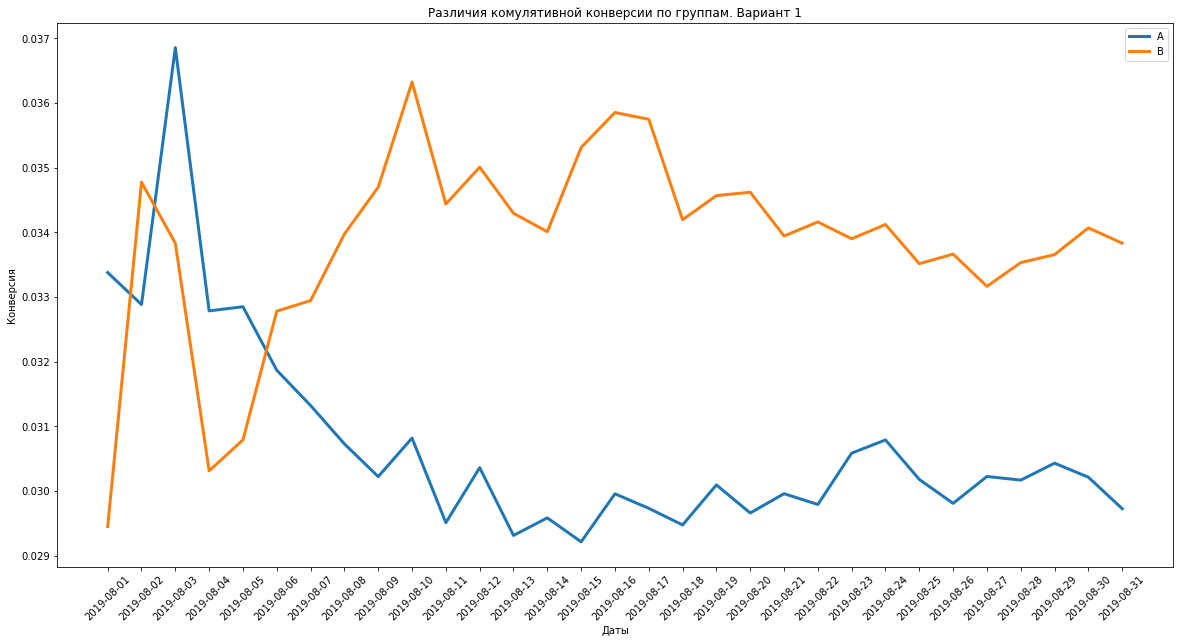

In [42]:
# Формируем график без изменения масштаба осей. Вариант 1
plt.figure(figsize=(20, 10))
plt.plot(general_cumA['date'], general_cumA['conversion'], label='A',linewidth=3)
plt.plot(general_cumB['date'], general_cumB['conversion'], label='B',linewidth=3)
plt.title('Различия комулятивной конверсии по группам. Вариант 1')
plt.ylabel("Конверсия")
plt.xlabel('Даты')
plt.xticks(rotation=45)
plt.legend()
plt.show()

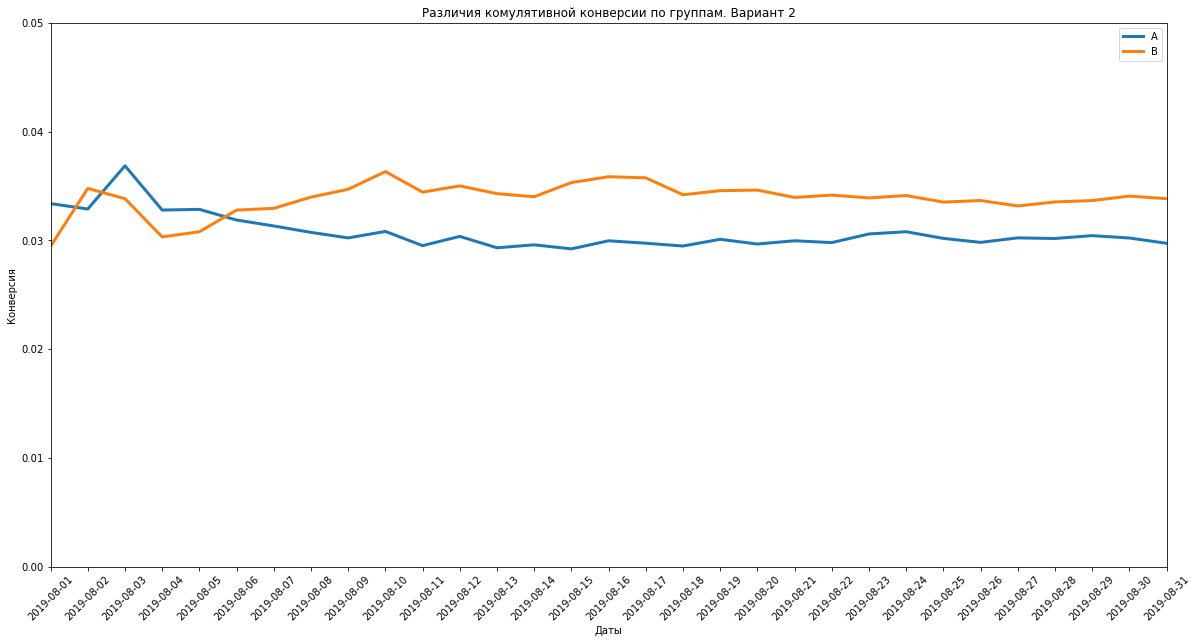

In [43]:
# Формируем график с изменением масштаба осей. Вариант 2
plt.figure(figsize=(20, 10))
plt.plot(general_cumA['date'], general_cumA['conversion'], label='A',linewidth=3)
plt.plot(general_cumB['date'], general_cumB['conversion'], label='B',linewidth=3)
plt.title('Различия комулятивной конверсии по группам. Вариант 2')
plt.axis(["2019-08-01", '2019-08-31', 0, 0.05])
plt.ylabel("Конверсия")
plt.xlabel('Даты')
plt.xticks(rotation=45)
plt.legend()
plt.show()

### Промежуточные выводы:
- На графике без изменения масштаба осей (Вариант1) видно, как после пика в начале эксперимента, конверсия группы В резко снижается (порядка 0,030) и, наоборот, после спада, конверсия группы А существенно повышается до уровня 0,033 - 0,034.
- Масштабирование осей (Вариант 2) позволило увидеть, что абсолютное значние колебания и в начале, и в конце теста не слишком большое (от 2 до 4%). Однако, в относительных величинах это, примерно, двухкратная разница.
- Применение масштабирования осей также позволило зафиксировать факт того, что конверсия установилась относительно своего среднего значения.

### График относительного изменения кумулятивной конверсии группы B к группе A

In [44]:
# Объединяем таблицы методом .merge()
cum_conversions = general_cumA[['date','conversion']].merge(general_cumB[['date','conversion']], 
                                                                        left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

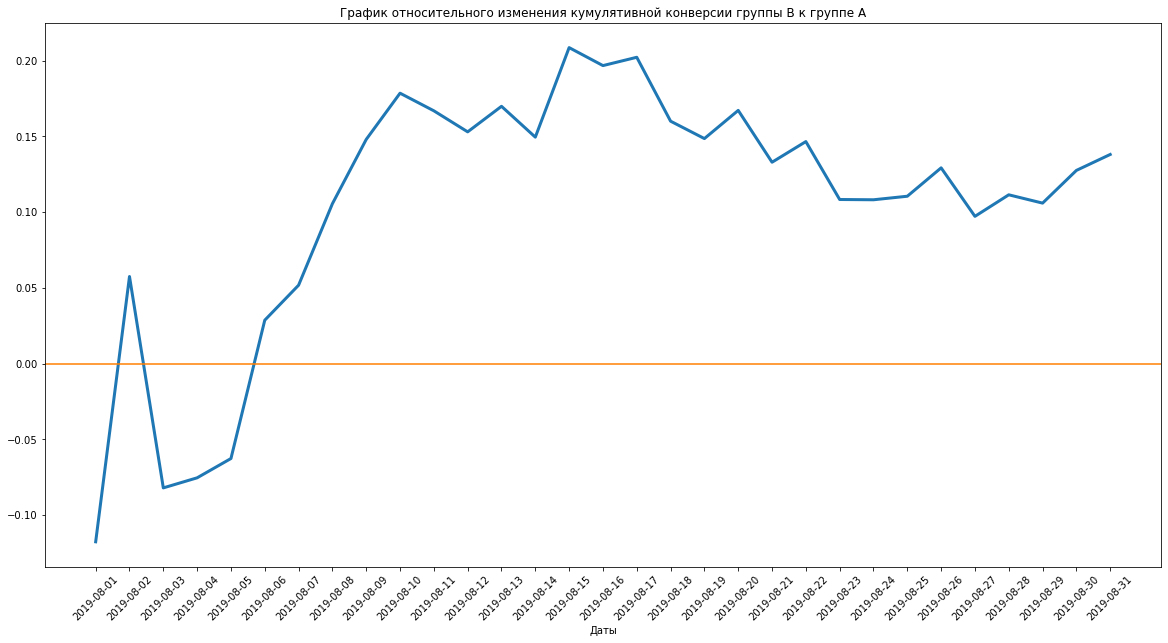

In [45]:
# Формируем график
plt.figure(figsize=(20, 10))
plt.plot(cum_conversions['date'], cum_conversions['conversionB'] / cum_conversions['conversionA']-1,linewidth=3)
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.axhline(y=0, color='#FF7E00', linestyle='-')
plt.xlabel('Даты')
plt.xticks(rotation=45)
plt.show()

### Промежуточные выводы:
- Практически с самого начала конверсия группы В возрастает, группа В лидирует по конверсии.
- После относительно небольшого провала в самом начале, конверсия группы В растет либо зафиксировалась в районе 12%.

### Точечный график количества заказов по пользователям

In [46]:
# Формируем новый датасет, используя функцию .agg()
orders_per_user = orders.groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})

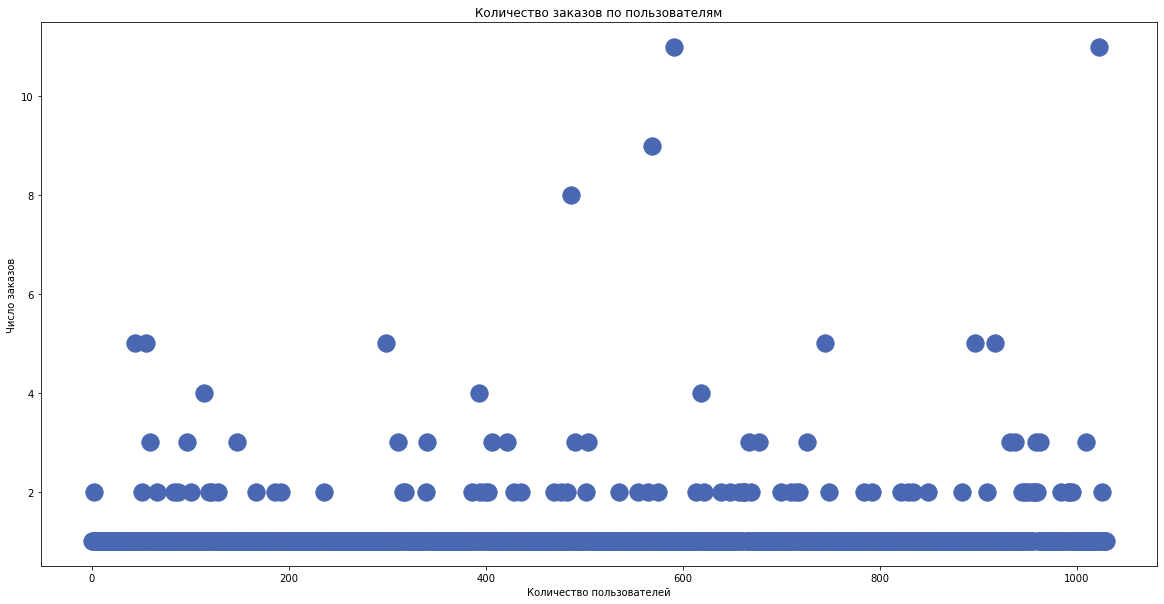

In [47]:
# Выводим диаграмму методом scatter()
x_values = pd.Series(range(0,len(orders_per_user['transactionId'])))
plt.figure(figsize=(20, 10))
plt.scatter(x_values, orders_per_user['transactionId'], color='#4a67b2', marker='o',s=300)
plt.title('Количество заказов по пользователям')
plt.xlabel('Количество пользователей')
plt.ylabel('Число заказов')
plt.show()

### Промежуточные выводы:
- Пользователей, заказывающих больше двух раз мало. Вполне вероятно, это - аномалии.
- Есть пользователи, делавшие более 10 заказов. Очевидно, это аномальные значения.

### Подсчет 95-го и 99-го перцентилей количества заказов на пользователя. Выбор границы для определения аномальных пользователей

In [48]:
# Рассчитываем 95-й и 99-й перцентили количества заказов на пользователя
print('95 перцентиль: %.2f' % (np.percentile(orders_per_user['transactionId'], [95])))
print('99 перцентиль: %.2f' % (np.percentile(orders_per_user['transactionId'], [99])))

95 перцентиль: 2.00
99 перцентиль: 4.00


<b>Не более 5% пользователей совершали больше 2 заказов. Не более 1 одного процента совершали более 4 заказов.</b>

In [49]:
# Определяем максимальное значение заказов на одного пользователя
orders_per_user['transactionId'].max()

11

In [50]:
# Используем функцию ptp, которая возвращает диапазон значений массива (она эквивалентна np.max()-np.min())
np.ptp(orders_per_user['transactionId'], axis=0)

10

In [51]:
# Проверяем, являются ли заказы числом более 4 очевидными выбросами
outlines= orders_per_user[orders_per_user['transactionId'] >= 4]['visitorId']
outlines.to_list()

[199603092,
 237748145,
 457167155,
 1230306981,
 1614305549,
 2038680547,
 2378935119,
 2458001652,
 2587333274,
 3062433592,
 3717692402,
 3803269165,
 4256040402]

<b>Все, что лежит за границей 99-го перцентиля является аномалиями</b>

### Точечный график стоимости заказов

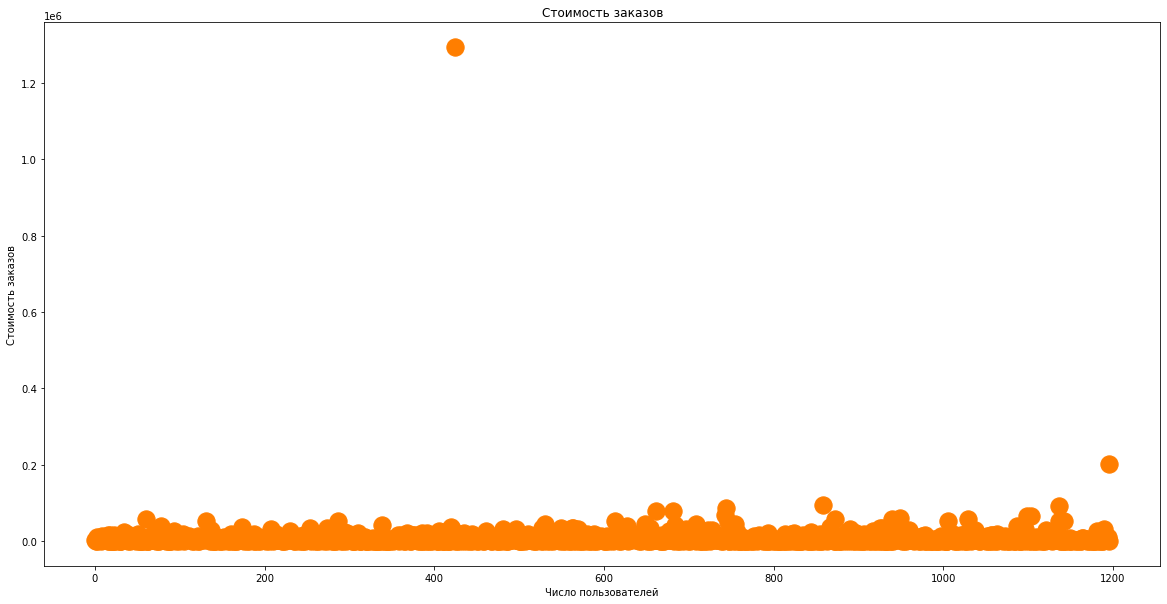

In [52]:
# Выводим диаграмму методом scatter()
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(20, 10))
plt.scatter(x_values, orders['revenue'], color='#FF7E00', marker='o',s=300)
plt.title('Стоимость заказов')
plt.xlabel('Число пользователей')
plt.ylabel('Стоимость заказов')
plt.show()

### Промежуточные выводы:
- Границей для определения аномальных пользователей является 99-й перцентиль.
- Основная масса пользователей совершала заказы стоимостью до 200000 рублей.
- Заказ, стоимостью 1200000 рублей выглядит аномально.

### Подсчет 95-го и 99-го перцентилей стоимости заказов. Выбор границы для определения аномальных заказов

In [53]:
# Рассчитываем 95-й и 99-й перцентили стоимости заказов
print('95 перцентиль: %.2f' % (np.percentile(orders['revenue'], [95])))
print('99 перцентиль: %.2f' % (np.percentile(orders['revenue'], [99])))

95 перцентиль: 28000.00
99 перцентиль: 58233.20


In [54]:
# Определяем максимальное значение
orders['revenue'].max()

1294500

In [55]:
# Используем функцию ptp
np.ptp(orders['revenue'], axis=0)

1294450

<b>Границей для определения аномальных заказов явялется 99-й перцентиль</b>

### Посчет статистической значимости различий в конверсии между группами по «сырым» данным

<b>ФОРМУЛИРОВКА ГИПОТЕЗ:</b>
- <b>Нулевая гипотеза:</b> Конверсия в группе A <b>РАВНА</b> конверсии в группе B
- <b>Альтернативная гипотеза:</b> Конверсия в группе A <b>НЕ РАВНА</b> конверсии в группе B

In [56]:
# Формируем новый датасет
conversion = (orders.groupby('group').agg({'transactionId':'count'}))\
                                     .join((visitors.groupby('group').agg({'visitors':'sum'}))).reset_index()
conversion['conversion'] = conversion['transactionId'] / conversion['visitors']

In [57]:
# Выводим результат
conversion

,group,transactionId,visitors,conversion
0,A,557,18736,0.029729
1,B,640,18916,0.033834


In [58]:
# Создаем функцию для подсчета z-критерия
def z_criteria (dataframe):
    alpha=0.05
    X = np.array(dataframe['transactionId'])
    Y = np.array(dataframe['visitors'])
    p1 = X[0] / Y[0]
    p2 = X[1] / Y[1]
    p_combined = (X[0] + X[1]) / (Y[0] + Y[1])
    difference = p1 - p2
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1 / Y[0] + 1 / Y[1]))
    distr = st.norm(0,1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    print('p-значение: ', p_value)
    if (p_value < alpha):
        print('Отвергаем нулевую гипотезу')
    else:
        print('Не удалось отвергнуть нулевую гипотезу')

In [59]:
# Подсчитываем z-критерий
z_criteria(conversion)

p-значение:  0.02320723394441848
Отвергаем нулевую гипотезу


### Промежуточные выводы:
- Конверсия в группе В выше, чем конверсия в группе А; статистическая значимость различий присутствует.
- р-значение в данном оказалось чуть выше 2%.

### Подсчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

<b>ФОРМУЛИРОВКА ГИПОТЕЗ:</b>
- <b>Нулевая гипотеза:</b> Средний чек группы A <b>НЕ ПРЕВОСХОДИТ</b> средний чек группы B
- <b>Альтернативная гипотеза:</b> Средний чек группы A <b>ПРЕВОСХОДИТ</b> средний чек группы B 

In [60]:
# Создаем функцию для подсчета критерия Манна-Уитни
def mw_criteria(dataframe):
    alpha=0.05
    results = st.mannwhitneyu(dataframe[dataframe['group']=='A']['revenue'], 
                          dataframe[dataframe['group']=='B']['revenue'])
    pvalue = results.pvalue
    print('p-значение: ', pvalue)
    if (pvalue < alpha):
        print('Отвергаем нулевую гипотезу')
    else:
        print('Не удалось отвергнуть нулевую гипотезу')

In [61]:
# Подсчитываем критерий
mw_criteria(orders)

p-значение:  0.3646454927716229
Не удалось отвергнуть нулевую гипотезу


In [62]:
# Подсчитаем величину среднего чека в группе А перед "очисткой" данных
orders[orders['group']=='A']['revenue'].mean()

7333.578096947936

In [63]:
# Подсчитаем величину среднего чека в группе В перед "очисткой" данных
orders[orders['group']=='B']['revenue'].mean()

9230.875

### Промежуточные выводы:
- Применение критерия Манна-Уитни показало отсутствие статистической значимости различий в среднем чеке заказа по группам (по "сырым" данным).
- р-значение равно примерно 4%. 

### Подсчет статистической значимости различий в конверсии между группами по «очищенным» данным

<b>ФОРМУЛИРОВКА ГИПОТЕЗ:</b>
- <b>Нулевая гипотеза:</b> Конверсия в группе A <b>РАВНА</b> конверсии в группе B
- <b>Альтернативная гипотеза:</b> Конверсия в группе A <b>НЕ РАВНА</b> конверсии в группе B

In [64]:
# Формируем "чистые" (отфильтрованные) данные
orders_temp = orders[~orders['visitorId'].isin(outlines)]
conversion_filtered = (orders_temp.groupby('group').
                       agg({'transactionId':'count'}).
                       join((visitors.groupby('group')).agg({'visitors':'sum'}))).reset_index()

In [65]:
# Подсчитываем z-критерий
z_criteria(conversion_filtered)

p-значение:  0.019821291468021807
Отвергаем нулевую гипотезу


### Промежуточные выводы:
- Даже после "очистки" данных, конверсия в группе В выше, чем конверсия в группе А; статистическая значимость различий присутствует.
- р-значение так и осталось равным примерно 2%. 

### Подсчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным

<b>ФОРМУЛИРОВКА ГИПОТЕЗ:</b>
- <b>Нулевая гипотеза:</b> Средний чек группы A <b>НЕ ПРЕВОСХОДИТ</b> средний чек группы B
- <b>Альтернативная гипотеза:</b> Средний чек группы A <b>ПРЕВОСХОДИТ</b> средний чек группы B 

In [66]:
# "Очищаем" данные при помощи метода .query, взяв срез по 99-му перцентелю
orders_filtered = orders.query('revenue <= 58233')

In [67]:
# Подсчитываем критерий Maнна-Уитни
mw_criteria(orders_filtered)

p-значение:  0.31043134834237274
Не удалось отвергнуть нулевую гипотезу


In [68]:
# Подсчитаем величину среднего чека в группе А после "очистки" данных
orders_filtered[orders_filtered['group']=='A']['revenue'].mean()

6470.587272727273

In [69]:
# Подсчитаем величину среднего чека в группе B после "очистки" данных
orders_filtered[orders_filtered['group']=='B']['revenue'].mean()

6592.692913385827

### Промежуточные выводы:
- После применения "очистки" данных, статистическая значимость различий в среднем чеке заказа по группам все равно отсутствует.
- При этом средние значения чеков (после фильтрации данных) сильно изменились и стали практически идентичными 6471 (для группы А) и 6593 (для группы В).
- р-значение равно 3%.

___

## Окончательные выводы и рекомендации

### Выводы:
- По конверсии между группами A и B есть статистически значимые различия как по "сырым", так и по "очищенным" данным.
- Напротив, по среднему чеку между группами A и B нет статистически значимых различий и по "сырым", и по "очищенным" данным.

### Рекомендации:
- Данный эксперимент можно остановить и считать успешным: в группе В конверсия из пользователя в покупателя  статистически значимо выше, чем в группе A. При этом средний чек между группами не отличается. 
- Лишним подтверждением того, что дальнейшее продолжение теста не является целесообразным, является то, что график "Различия комулятивной конверсии по группам" показывает, что конверсия установилась относительно своего среднего значения.